PILAR ARIAS, ÁLVARO GARCÍA CID, YEDRA MARTÍN, AMAYA SARASA

<GRUPO 7>

#INTRODUCCIÓN

En este proyecto se va a proceder a realizar un proyecto de creación de una red neuronal que nos permita solucionar un problema de regresión.

Para tomar el tema sobre el cual va a tratar este proyecto se ha decidido buscar un tema que en la actualidad pueda resultar útil. Por ello, debido al auge de la tecnología en nuestro día a día se ha considerado que un buen problema sería realizar una predicción acerca de la duración de la batería de un móvil, en función de diversos datos.

Se importa keras

In [51]:
import keras
keras.__version__

'2.9.0'

# Prediciendo la duración de la batería de un movil
Vamos a predecir la duración de la batería de un teléfono movil dados algunos datos como los píxeles de la cámara, si tiene o no conexión wifi, la cantidad de cores del procesador, etc. 

El conjunto de datos tiene un total de 2000 datos, que dividiremos entre 1750 de entrenamiento (de los cuales 500 serán para validación) y 250 de test. Las 21 carácaterísticas en los datos de entrada (por ejemplo, si tiene o no v) es una característica que tiene una escala diferente. Por ejemplo, algunos valores son proporciones, que toman valores entre 0 y 1, otros toman valores entre 1 y 12, otros entre 0 y 100 ...



In [52]:
import pandas as pd
datos=pd.read_csv('car_price_prediction.csv.zip',encoding='latin-1')
datos.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


Comprobamos que se han importado correctamente, los 2000 datos con 21 características. 

In [53]:
datos.shape

(19237, 18)

In [54]:
datos.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [55]:
datos=datos.dropna()

In [56]:
datos['Manufacturer'] = datos['Manufacturer'].astype('category').cat.codes
datos['Category'] = datos['Category'].astype('category').cat.codes
datos['Leather interior'] = datos['Leather interior'].astype('category').cat.codes
datos['Fuel type'] = datos['Fuel type'].astype('category').cat.codes
datos['Mileage'] = datos['Mileage'].astype('category').cat.codes
datos['Gear box type'] = datos['Gear box type'].astype('category').cat.codes
datos['Doors'] = datos['Doors'].astype('category').cat.codes
datos['Wheel'] = datos['Wheel'].astype('category').cat.codes
datos['Color'] = datos['Color'].astype('category').cat.codes
datos['Drive wheels'] = datos['Drive wheels'].astype('category').cat.codes
datos['Model'] = datos['Model'].astype('category').cat.codes

In [57]:
datos

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,32,1242,2010,4,1,2,3.5,2838,6.0,0,0,1,0,12,12
1,44731507,16621,1018,8,658,2011,4,0,5,3,2960,6.0,2,0,1,0,1,8
2,45774419,8467,-,21,684,2006,3,0,5,1.3,3140,4.0,3,1,1,1,1,2
3,45769185,3607,862,16,661,2011,4,1,2,2.5,2413,4.0,0,0,1,0,14,0
4,45809263,11726,446,21,684,2014,3,1,5,1.3,7396,4.0,0,1,1,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,36,385,1999,1,1,0,2.0 Turbo,4394,4.0,1,2,0,0,12,5
19233,45778856,15681,831,23,1334,2011,9,1,5,2.4,2214,4.0,2,1,1,0,11,8
19234,45804997,26108,836,23,1442,2010,4,1,1,2,638,4.0,0,1,1,0,7,4
19235,45793526,5331,1288,8,456,2007,4,1,1,2,5612,4.0,0,1,1,0,1,4


In [ ]:
mean = train_datos.mean(axis=0)
print(mean)

In [58]:
for c in datos.columns:
    print("Missing values [{0}]:".format(c), datos[c].isna().sum())
print()

# Valores únicos    
for c in datos.columns:
    print("Unique values [{0}]:".format(c), datos[c].unique().size)

Missing values [ID]: 0
Missing values [Price]: 0
Missing values [Levy]: 0
Missing values [Manufacturer]: 0
Missing values [Model]: 0
Missing values [Prod. year]: 0
Missing values [Category]: 0
Missing values [Leather interior]: 0
Missing values [Fuel type]: 0
Missing values [Engine volume]: 0
Missing values [Mileage]: 0
Missing values [Cylinders]: 0
Missing values [Gear box type]: 0
Missing values [Drive wheels]: 0
Missing values [Doors]: 0
Missing values [Wheel]: 0
Missing values [Color]: 0
Missing values [Airbags]: 0

Unique values [ID]: 18924
Unique values [Price]: 2315
Unique values [Levy]: 559
Unique values [Manufacturer]: 65
Unique values [Model]: 1590
Unique values [Prod. year]: 54
Unique values [Category]: 11
Unique values [Leather interior]: 2
Unique values [Fuel type]: 7
Unique values [Engine volume]: 107
Unique values [Mileage]: 7687
Unique values [Cylinders]: 13
Unique values [Gear box type]: 4
Unique values [Drive wheels]: 3
Unique values [Doors]: 3
Unique values [Wheel]: 

In [59]:
datos.loc[2]

ID                  45774419
Price                   8467
Levy                       -
Manufacturer              21
Model                    684
Prod. year              2006
Category                   3
Leather interior           0
Fuel type                  5
Engine volume            1.3
Mileage                 3140
Cylinders                4.0
Gear box type              3
Drive wheels               1
Doors                      1
Wheel                      1
Color                      1
Airbags                    2
Name: 2, dtype: object

Separamos los datos en entrenamiento y test y sus correspondientes soluciones, que serán la característica 17 (talk_time) que según explicaba la página donde hemos tomado la base, es el tiempo que dura el móvil desde su última carga. 


In [60]:
labels=datos.Price
labels.shape


(19237,)

In [61]:
datos=datos.drop(['Price'],axis=1)
datos=datos.drop(['ID'],axis=1)
datos=datos.drop(['Engine volume'],axis=1)
datos=datos.drop(['Levy'],axis=1)

In [62]:
datos.shape

(19237, 14)

In [63]:
datos

,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,32,1242,2010,4,1,2,2838,6.0,0,0,1,0,12,12
1,8,658,2011,4,0,5,2960,6.0,2,0,1,0,1,8
2,21,684,2006,3,0,5,3140,4.0,3,1,1,1,1,2
3,16,661,2011,4,1,2,2413,4.0,0,0,1,0,14,0
4,21,684,2014,3,1,5,7396,4.0,0,1,1,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,36,385,1999,1,1,0,4394,4.0,1,2,0,0,12,5
19233,23,1334,2011,9,1,5,2214,4.0,2,1,1,0,11,8
19234,23,1442,2010,4,1,1,638,4.0,0,1,1,0,7,4
19235,8,456,2007,4,1,1,5612,4.0,0,1,1,0,1,4


In [64]:
train_datos=datos[:15000]
test_datos=datos[15001:]

train_labels=labels[:15000]
test_labels=labels[15001:]

In [65]:
train_labels[0]

13328

In [66]:
train_datos.shape

(15000, 14)

In [67]:
test_datos

,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
15001,41,1410,2007,9,1,5,2099,4.0,3,1,1,1,1,7
15002,58,435,2008,9,0,5,2973,4.0,0,1,1,0,12,2
15003,58,435,2012,9,1,5,1249,6.0,2,1,1,0,14,12
15004,23,1334,2015,9,0,5,6280,4.0,2,1,1,0,1,12
15005,36,334,2013,9,1,5,975,6.0,2,2,1,0,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,36,385,1999,1,1,0,4394,4.0,1,2,0,0,12,5
19233,23,1334,2011,9,1,5,2214,4.0,2,1,1,0,11,8
19234,23,1442,2010,4,1,1,638,4.0,0,1,1,0,7,4
19235,8,456,2007,4,1,1,5612,4.0,0,1,1,0,1,4


Una vez tenemos los datos separados, vamos a normalizarlos, puesto que cada uno tienen rangos distintos. 

In [68]:
# Normalizamos basándonos en la característica
##############################################
# Calculamos la media del primer eje de los datos de entrenamiento
mean = train_datos.mean(axis=0)
print("##### Media de las 14 características de los datos de entrenamiento ##### ")
print(mean)
# A los datos de entrenamiento le restamos la media
train_datos -= mean

# Calculamos la desviación estandar del primer eje de los datos de entrenamiento
std = train_datos.std(axis=0)
print("##### Desviación estandar de las 14 características de los datos de entrenamiento ##### ")
print(std)
# A los datos de entrenamiento los dividimos por la desviación estándar
train_datos /= std

# ¡¡IMPORTANTE!!: USAMOS LA MEDIA Y LA DESVIACIÓN ESTANDAR DE LOS DATOS DE 
# ENTRENAMIENTO PARA NORMALIZAR EL SET DE DATOS DE LOS DATOS DE TEST 
test_datos -= mean
test_datos /= std

##### Media de las 14 características de los datos de entrenamiento ##### 
Manufacturer          33.211533
Model                862.106533
Prod. year          2010.897400
Category               6.253933
Leather interior       0.724733
Fuel type              3.440533
Mileage             3367.173200
Cylinders              4.583000
Gear box type          0.529000
Drive wheels           0.905333
Doors                  0.965867
Wheel                  0.077067
Color                  7.790800
Airbags                6.577333
dtype: float64
##### Desviación estandar de las 14 características de los datos de entrenamiento ##### 
Manufacturer          17.788514
Model                411.230896
Prod. year             5.682508
Category               2.793774
Leather interior       0.446663
Fuel type              1.805256
Mileage             2247.974049
Cylinders              1.205601
Gear box type          0.892494
Drive wheels           0.565915
Doors                  0.214565
Wheel                

In [69]:
train_datos.shape[1]

14

## CREAMOS LA RED

Como tenemos una base de datos tan pequeña, vamos a crear una base de datos muy pequeña con únicamente dos capas ocultas. 
 En general, cuantos menos datos de entrenamiento tengamos, peor será el sobreajuste y el uso una red pequeña es una forma de reducir el sobreajuste.

In [76]:
import tensorflow as tf
from keras import models
from keras import layers

def build_model():
    # Porque necesitaremos instanciar el mismo modelo 
    # múltiples veces, usamos una función para construirlo
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu',
                           input_shape=(train_datos.shape[1],)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1))
    # MSE: Mean Squared Error
    # MAE: Mean Absolute Error
    model.compile(optimizer='rmsprop', loss='mse', 
                  metrics=[tf.keras.metrics.MeanAbsoluteError()]) # metrics = ['mae']
    return model

Con estos datos, computamos el problema con las primeras 3/4 partes de los datos de entrenamiento para entrenar y el último 1/4 de los datos para validación

In [77]:
partial_train_datos = train_datos[:12000]
partial_eval_train_datos = train_datos[12001:]
partial_train_labels = train_labels[:12000]
partial_eval_train_labels= train_labels[12001:]

In [78]:
mymodel = build_model()

In [79]:
history = mymodel.fit(partial_train_datos, partial_train_labels,
            validation_data=(partial_eval_train_datos, partial_eval_train_labels),
                        epochs=100, batch_size=16)

Epoch 1/100
750/750 [==============================] - 3s 3ms/step - loss: 446398784.0000 - mean_absolute_error: 12231.7803 - val_loss: 258423872.0000 - val_mean_absolute_error: 10323.2285
Epoch 2/100
750/750 [==============================] - 2s 2ms/step - loss: 333056960.0000 - mean_absolute_error: 10236.3955 - val_loss: 241222672.0000 - val_mean_absolute_error: 9970.1924
Epoch 3/100
750/750 [==============================] - 2s 2ms/step - loss: 320891712.0000 - mean_absolute_error: 9947.4160 - val_loss: 233201808.0000 - val_mean_absolute_error: 9646.6514
Epoch 4/100
750/750 [==============================] - 2s 2ms/step - loss: 313896896.0000 - mean_absolute_error: 9726.6318 - val_loss: 228049072.0000 - val_mean_absolute_error: 9513.7549
Epoch 5/100
750/750 [==============================] - 2s 2ms/step - loss: 308063296.0000 - mean_absolute_error: 9590.2744 - val_loss: 223326496.0000 - val_mean_absolute_error: 9397.7773
Epoch 6/100
750/750 [==============================] - 2s 2ms/

In [80]:
mae_history = history.history['val_mean_absolute_error']

In [81]:
mse_history = history.history['val_loss']

Confrontamos en una gráfica las épocas frente a la pérdida pérdida (MSE)

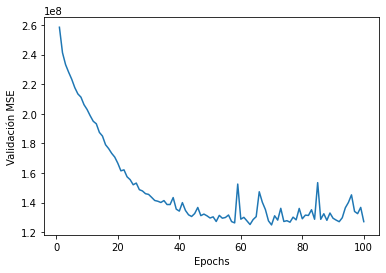

In [82]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(mse_history) + 1), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MSE')
plt.show()

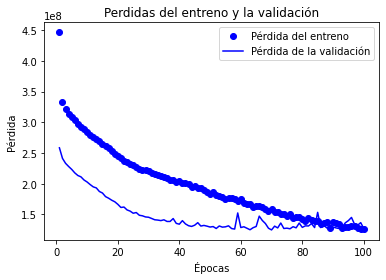

In [83]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

Confrontamos en una gráfica las épocas contra la métrica de error absoluto medio (MAE)

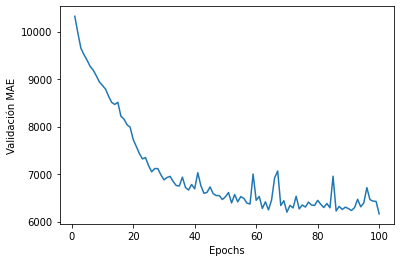

In [84]:
 import matplotlib.pyplot as plt

plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

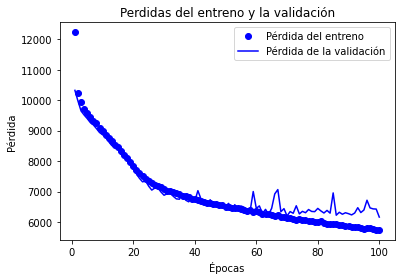

In [85]:
import matplotlib.pyplot as plt

loss = history.history['mean_absolute_error']
val_loss = history.history['val_mean_absolute_error']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [91]:
mymodel2 = build_model()

In [92]:
history = mymodel2.fit(partial_train_datos, partial_train_labels,
            validation_data=(partial_eval_train_datos, partial_eval_train_labels),
                        epochs=60, batch_size=16)

Epoch 1/60
750/750 [==============================] - 3s 3ms/step - loss: 449794400.0000 - mean_absolute_error: 12212.4736 - val_loss: 258194112.0000 - val_mean_absolute_error: 10262.0547
Epoch 2/60
750/750 [==============================] - 2s 2ms/step - loss: 334603104.0000 - mean_absolute_error: 10281.0215 - val_loss: 242899008.0000 - val_mean_absolute_error: 9968.9326
Epoch 3/60
750/750 [==============================] - 2s 2ms/step - loss: 324199936.0000 - mean_absolute_error: 9932.8691 - val_loss: 235636928.0000 - val_mean_absolute_error: 9728.6465
Epoch 4/60
750/750 [==============================] - 2s 2ms/step - loss: 314590112.0000 - mean_absolute_error: 9763.4824 - val_loss: 232893856.0000 - val_mean_absolute_error: 9519.4678
Epoch 5/60
750/750 [==============================] - 2s 2ms/step - loss: 309067616.0000 - mean_absolute_error: 9606.8643 - val_loss: 223170976.0000 - val_mean_absolute_error: 9598.1777
Epoch 6/60
750/750 [==============================] - 2s 2ms/step -

In [93]:
mae_history = history.history['val_mean_absolute_error']
mse_history = history.history['val_loss']

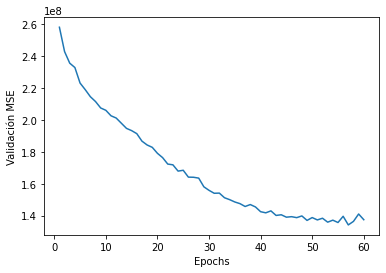

In [94]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(mse_history) + 1), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MSE')
plt.show()

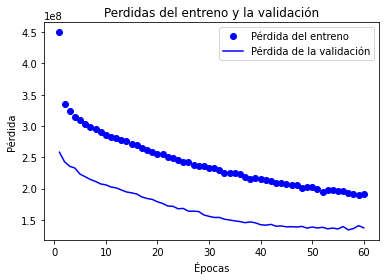

In [95]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

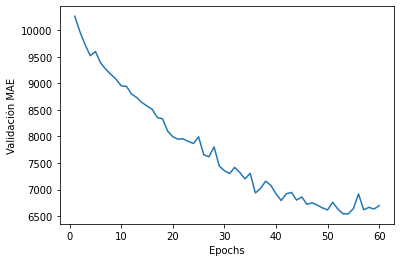

In [96]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

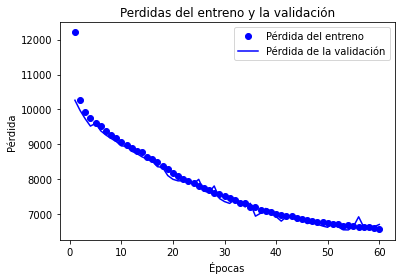

In [97]:
import matplotlib.pyplot as plt

loss = history.history['mean_absolute_error']
val_loss = history.history['val_mean_absolute_error']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [99]:
import numpy as np

# k= 4 particiones
k = 4
num_val_samples = len(partial_train_datos) // k # 404//4=101
print("num_val_samples", num_val_samples)
num_epochs = 60
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Preparamos la validación de los datos: datos de la partición #k
    print("Uso para validar el siguiente rango de datos de entrenamiento -> [",(i * num_val_samples),":",((i + 1) * num_val_samples),"]")
    val_data = partial_train_datos[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = partial_train_labels[i * num_val_samples: (i + 1) * num_val_samples]

    # Preparamos los datos de entrenamiento: Datos de las demás particiones
    print("Uso para entrenar el siguiente rango de datos de entrenamiento -> [0:",(i * num_val_samples),"]U[",(i + 1) * num_val_samples,":",len(partial_train_datos),"]")
    partial_train_data = np.concatenate(
        [partial_train_datos[:i * num_val_samples],
         partial_train_datos[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [partial_train_labels[:i * num_val_samples],
         partial_train_labels[(i + 1) * num_val_samples:]],
        axis=0)

    # Construcción del modelo Keras (ya compilado)
    model = build_model()
    # Entrenando el modelo (en modo silencioso, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    # Evalua el modelo sobre los datos de validación
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

num_val_samples 3000
processing fold # 0
Uso para validar el siguiente rango de datos de entrenamiento -> [ 0 : 3000 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 0 ]U[ 3000 : 12000 ]
processing fold # 1
Uso para validar el siguiente rango de datos de entrenamiento -> [ 3000 : 6000 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 3000 ]U[ 6000 : 12000 ]
processing fold # 2
Uso para validar el siguiente rango de datos de entrenamiento -> [ 6000 : 9000 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 6000 ]U[ 9000 : 12000 ]
processing fold # 3
Uso para validar el siguiente rango de datos de entrenamiento -> [ 9000 : 12000 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 9000 ]U[ 12000 : 12000 ]


In [100]:
all_scores

[7318.7431640625, 7127.0908203125, 7196.99267578125, 6880.8955078125]

In [101]:
np.mean(all_scores)

7130.9305419921875

In [102]:
from keras import backend as K

# Some memory clean-up
K.clear_session()

In [103]:
num_epochs = 200
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Preparamos la validación de los datos: datos de la partición # k
    print("Uso para validar el siguiente rango de datos de entrenamiento -> [",(i * num_val_samples),":",((i + 1) * num_val_samples),"]")
    val_data = partial_train_datos[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = partial_train_labels[i * num_val_samples: (i + 1) * num_val_samples]

    # Preparamos los datos de entrenamiento: Datos de todas la demás particiones
    print("Uso para entrenar el siguiente rango de datos de entrenamiento -> [0:",(i * num_val_samples),"]U[",(i + 1) * num_val_samples,":",len(partial_train_datos),"]")
    partial_train_data = np.concatenate(
        [partial_train_datos[:i * num_val_samples],
         partial_train_datos[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [partial_train_labels[:i * num_val_samples],
         partial_train_labels[(i + 1) * num_val_samples:]],
        axis=0)

    # Construcción del modelo Keras (ya compilado)
    model = build_model()
    # Entrenando el modelo (en modo silencioso, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
Uso para validar el siguiente rango de datos de entrenamiento -> [ 0 : 3000 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 0 ]U[ 3000 : 12000 ]
processing fold # 1
Uso para validar el siguiente rango de datos de entrenamiento -> [ 3000 : 6000 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 3000 ]U[ 6000 : 12000 ]
processing fold # 2
Uso para validar el siguiente rango de datos de entrenamiento -> [ 6000 : 9000 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 6000 ]U[ 9000 : 12000 ]
processing fold # 3
Uso para validar el siguiente rango de datos de entrenamiento -> [ 9000 : 12000 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 9000 ]U[ 12000 : 12000 ]


In [104]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

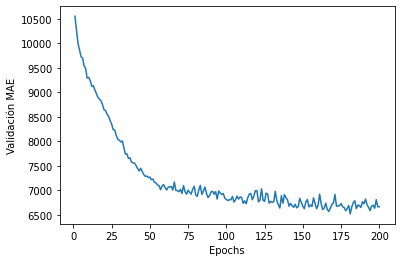

In [105]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

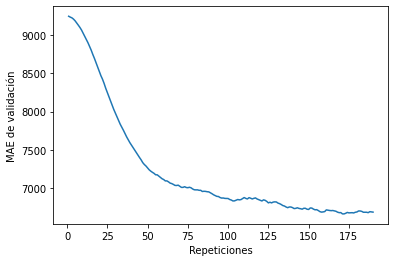

In [106]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Repeticiones')
plt.ylabel('MAE de validación')
plt.show()

In [109]:
# Obtenemos un modelo compilado nuevo
model = build_model()
# Lo entrenamos en todos los datos.
model.fit(train_datos, train_labels,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_datos, test_labels )

133/133 [==============================] - 0s 1ms/step - loss: 163414458368.0000 - mean_absolute_error: 12651.3848


In [110]:
test_mae_score

12651.384765625